# Sequence alignments

## Pairwise sequence alignment

Pairwise sequence alignment is one form of sequence alignment technique, where we compare only two sequences. This process involves finding the optimal alignment between the two sequences, scoring based on their similarity (how similar they are) or distance (how different they are), and then assessing the significance of this score.

The basis of sequence alignment lies with the scoring process, where the two sequences are given a score on how similar (or different) they are to each other. The pairwise sequence aligning algorithms require a scoring matrix to keep track of the scores assigned. The scoring matrix assigns a positive score for a match, and a penalty for a mismatch. Three basic aspects are considered when assigning scores. They are:

1. Match value — Value assigned for matching characters
2. Mismatch value — Value assigned for mismatching characters
3. Gap penalty — Value assigned for spaces

In [2]:
from Bio import SeqIO
from Bio import pairwise2
from Bio.pairwise2 import *

### Global alignment

This method finds the best alignment over the entire lengths of the 2 sequences. What is the maximum similarity between sequence X and Y?

One of the algorithms that uses dynamic programming to obtain global alignment is the Needleman-Wunsch algorithm. This algorithm was published by Needleman and Wunsch in 1970 for alignment of two protein sequences and it was the first application of dynamic programming to biological sequence analysis. The Needleman-Wunsch algorithm finds the best-scoring global alignment between two sequences.

In [3]:
record1 = SeqIO.parse('./resources/HBB-human.fasta', 'fasta')
record2 = SeqIO.parse('./resources/HBB-rat.fasta', 'fasta')

for element in record1:
    hbb_hum = str(element.seq)

for element in record2:
    hbb_rat = str(element.seq)

print(hbb_hum)
print(hbb_rat)

ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGCAA
TGCTTCTGACATAGTTGTGTTGACTCACAAACTCAGAAACAGACACCATGGTGCACCTGACTGATGCTGAGAAGGCTGCTGTTAATGGCCTGTGGGGAAAGGTGAACCCTGATGATGTTGGTGGCGAGGCCCTGGGCAGGCTGCTGGTTGTCTACCCTTGGACCCAGAGGTACTTTGATAGCTTTGGGGACCTGTCCTCTGCCTCTGCTATCATGGGTAACCCTAAGGTGAAGGCCCATGGCAAGAAGGTGATAAACGCCTTCAATGATGGCCTGAAACACTTGGACAACCTCAAGGGCACCTTTGCTCATCTGAGTGAACTCCACTGTGACAAGCTGCATGTGGATCCTGAGAACTTCAGGCTCCTGGGC

In [4]:
help(pairwise2)

Help on module Bio.pairwise2 in Bio:

NAME
    Bio.pairwise2 - Pairwise sequence alignment using a dynamic programming algorithm.

DESCRIPTION
    This provides functions to get global and local alignments between two
    sequences. A global alignment finds the best concordance between all
    characters in two sequences. A local alignment finds just the
    subsequences that align the best. Local alignments must have a positive
    score to be reported and they will not be extended for 'zero counting'
    matches. This means a local alignment will always start and end with
    a positive counting match.
    
    When doing alignments, you can specify the match score and gap
    penalties.  The match score indicates the compatibility between an
    alignment of two characters in the sequences. Highly compatible
    characters should be given positive scores, and incompatible ones
    should be given negative scores or 0.  The gap penalties should be
    negative.
    
    The names of 

In [5]:
help(pairwise2.align)

Help on align in module Bio.pairwise2 object:

class align(builtins.object)
 |  Provide functions that do alignments.
 |  
 |  Alignment functions are called as:
 |  
 |    pairwise2.align.globalXX
 |  
 |  or
 |  
 |    pairwise2.align.localXX
 |  
 |  Where XX is a 2 character code indicating the match/mismatch parameters
 |  (first character, either x, m, d or c) and the gap penalty parameters
 |  (second character, either x, s, d, or c).
 |  
 |  For a detailed description read the main module's docstring (e.g.,
 |  type ``help(pairwise2)``).
 |  To see a description of the parameters for a function, please
 |  look at the docstring for the function, e.g. type
 |  ``help(pairwise2.align.localds)`` at the Python prompt.
 |  
 |  Methods defined here:
 |  
 |  __getattr__(self, attr)
 |      Call alignment_function() to check and decode the attributes.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__


In [6]:
help(pairwise2.align.globalxs)

Help on alignment_function in module Bio.pairwise2 object:

globalxs = class alignment_function(builtins.object)
 |  globalxs(name)
 |  
 |  globalxs(sequenceA, sequenceB, open, extend) -> alignments
 |  
 |  The following parameters can also be used with optional
 |  keywords of the same name.
 |  
 |  
 |  sequenceA and sequenceB must be of the same type, either
 |  strings, lists or Biopython sequence objects.
 |  
 |  
 |  open and extend are the gap penalties when a gap is
 |  opened and extended.  They should be negative.
 |  
 |  alignments is a list of named tuples (seqA, seqB, score,
 |  begin, end). seqA and seqB are strings showing the alignment
 |  between the sequences.  score is the score of the alignment.
 |  begin and end are indexes of seqA and seqB that indicate
 |  where the alignment occurs.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **keywds)
 |      Call the alignment instance already created.
 |  
 |  __init__(self, name)
 |      Check to make 

#### Parameters

The [pairwise2 module](http://biopython.org/DIST/docs/api/Bio.pairwise2-module.html) provides alignment functions to get global and local alignments between two sequences. Calling the function `<alignment type>XX` is either global or local and `XX` is a 2 character code indicating the parameters it takes. The first character indicates the parameters for **matches** (and mismatches), and the second indicates the parameters for **gap penalties**.

##### Match parameters

* x - No parameters. Identical characters have score of 1, else 0.
* m - A match score is the score of identical chars, else mismatch score.
* d - A dictionary returns the score of any pair of characters.
* c - A callback function returns scores.

##### Gap penalty parameters

* x - No gap penalties.
* s - Same open and extend gap penalties for both sequences.
* d - The sequences have different open and extend gap penalties.
* c - A callback function returns the gap penalties.

In [7]:
# `xx` means no parameters, i.e. same character=1 else 0; no gap penalty
global_alignment = pairwise2.align.globalxx(hbb_hum, hbb_rat)
print(global_alignment[0]) # returns a list of alignments

Alignment(seqA='ACATTTGCTTCTGACACA-AC-T-GTGTTC-ACT-AGCAAC-CTCA-AA-CAGACACCATGGTGCATC-TGACTCCTGA-G--GAGAAGT-CTGCC-GTTAC-TGC-CCTGTGGGGCAA-GGTGAACG--TGGATGAA-GTTGGTGGT-GAGGCCCTGGGCAGGCTGCTGGTG-GTCTACCCTTGGACCCAGAGGTT-CTTTGAGTC--CTTTGGGGATC-TGTCCACTCCTGA--TGCTG-T-T-ATGGGC-AACCCTAAGGTGAAGGCTC-ATGGCAAGAAAGTGCTCGG-T----GCCTTT-AG-TGATGGCCTGGCTCA--C-CT-GGACAACCTCAAGGGCACCTTTGCCA-CA-CTGAGTGAG-CTGC-ACTGTGACAAGCTGCAC-GTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGT--GC-T-G-G-TCTGTGTGCTGGC-CCATC-ACTT-TGG-CAAAG-AATTCACCCCACCA-GTGCA--GGCTGCCTATC-AGAAAG-TGGTGGCTGGT-GTGGCTA-A-TGCCCTGGCC-CACAAGTATC-ACTAAGCT-CGCT-TTCTTGC-TGTC-CAATT-TCTATTA----AA-GGTTCCT--TTGTTCCCTAAGTCCA-A-CTACTAAACTGGG---G--GATAT-T-A---TGA-AGG--G-CCTT-GAGCATCTGGAT-TCTG-CCTAA-TAA-AAAA--CATTTAT-TTTCAT-TGCAA', seqB='-----TGCTTCTG--ACATA-GTTGTGTT-GACTCA-CAA-ACTCAGAAACAGACACCATGGTGCA-CCTGA---CTGATGCTGAGAAG-GCTG-CTGTTA-ATG-GCCTGTGGGG-AAAGGTGAAC-CCT-GATG-ATGTTGGTGG-CGAGGCCCTGGGCAGGCTGCTGGT-TGTCTACCCTTGGACCCAGAGG-TACTTTGA-T-AGCTTTGGGGA-CCTGT-C-CT-CTG-CCT-CT

In [8]:
for a in global_alignment[:3]:
    print(a)

Alignment(seqA='ACATTTGCTTCTGACACA-AC-T-GTGTTC-ACT-AGCAAC-CTCA-AA-CAGACACCATGGTGCATC-TGACTCCTGA-G--GAGAAGT-CTGCC-GTTAC-TGC-CCTGTGGGGCAA-GGTGAACG--TGGATGAA-GTTGGTGGT-GAGGCCCTGGGCAGGCTGCTGGTG-GTCTACCCTTGGACCCAGAGGTT-CTTTGAGTC--CTTTGGGGATC-TGTCCACTCCTGA--TGCTG-T-T-ATGGGC-AACCCTAAGGTGAAGGCTC-ATGGCAAGAAAGTGCTCGG-T----GCCTTT-AG-TGATGGCCTGGCTCA--C-CT-GGACAACCTCAAGGGCACCTTTGCCA-CA-CTGAGTGAG-CTGC-ACTGTGACAAGCTGCAC-GTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGT--GC-T-G-G-TCTGTGTGCTGGC-CCATC-ACTT-TGG-CAAAG-AATTCACCCCACCA-GTGCA--GGCTGCCTATC-AGAAAG-TGGTGGCTGGT-GTGGCTA-A-TGCCCTGGCC-CACAAGTATC-ACTAAGCT-CGCT-TTCTTGC-TGTC-CAATT-TCTATTA----AA-GGTTCCT--TTGTTCCCTAAGTCCA-A-CTACTAAACTGGG---G--GATAT-T-A---TGA-AGG--G-CCTT-GAGCATCTGGAT-TCTG-CCTAA-TAA-AAAA--CATTTAT-TTTCAT-TGCAA', seqB='-----TGCTTCTG--ACATA-GTTGTGTT-GACTCA-CAA-ACTCAGAAACAGACACCATGGTGCA-CCTGA---CTGATGCTGAGAAG-GCTG-CTGTTA-ATG-GCCTGTGGGG-AAAGGTGAAC-CCT-GATG-ATGTTGGTGG-CGAGGCCCTGGGCAGGCTGCTGGT-TGTCTACCCTTGGACCCAGAGG-TACTTTGA-T-AGCTTTGGGGA-CCTGT-C-CT-CTG-CCT-CT

In [9]:
print(format_alignment(*global_alignment[0]))

ACATTTGCTTCTGACACA-AC-T-GTGTTC-ACT-AGCAAC-CTCA-AA-CAGACACCATGGTGCATC-TGACTCCTGA-G--GAGAAGT-CTGCC-GTTAC-TGC-CCTGTGGGGCAA-GGTGAACG--TGGATGAA-GTTGGTGGT-GAGGCCCTGGGCAGGCTGCTGGTG-GTCTACCCTTGGACCCAGAGGTT-CTTTGAGTC--CTTTGGGGATC-TGTCCACTCCTGA--TGCTG-T-T-ATGGGC-AACCCTAAGGTGAAGGCTC-ATGGCAAGAAAGTGCTCGG-T----GCCTTT-AG-TGATGGCCTGGCTCA--C-CT-GGACAACCTCAAGGGCACCTTTGCCA-CA-CTGAGTGAG-CTGC-ACTGTGACAAGCTGCAC-GTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGT--GC-T-G-G-TCTGTGTGCTGGC-CCATC-ACTT-TGG-CAAAG-AATTCACCCCACCA-GTGCA--GGCTGCCTATC-AGAAAG-TGGTGGCTGGT-GTGGCTA-A-TGCCCTGGCC-CACAAGTATC-ACTAAGCT-CGCT-TTCTTGC-TGTC-CAATT-TCTATTA----AA-GGTTCCT--TTGTTCCCTAAGTCCA-A-CTACTAAACTGGG---G--GATAT-T-A---TGA-AGG--G-CCTT-GAGCATCTGGAT-TCTG-CCTAA-TAA-AAAA--CATTTAT-TTTCAT-TGCAA
     ||||||||  ||| |  | |||||  ||| | |||  |||| || |||||||||||||||| | |||   |||| |  ||||||  ||| | ||||  ||  ||||||||| || |||||||   | |||| | ||||||||  |||||||||||||||||||||||  ||||||||||||||||||||| | |||||| |   ||||||||| | ||| | || |||   | ||| | | |||||  |||||||||||

### Local alignment

This method finds the most similar subsequences among the 2 sequences. What is the maximum similarity between a subsequence of X and a subsequence of Y?

One of the algorithms that uses dynamic programming to obtain local alignments within two given sequences is the Smith-Waterman algorithm. Smith and Waterman published an application of dynamic programming to find the optimal local alignments in 1981. This algorithm is similar to Needleman-Wunsch algorithm, but there are slight differences with the scoring process.

In [10]:
local_alignment = pairwise2.align.localxx(hbb_hum, hbb_rat)
print(format_alignment(*local_alignment[0]))

6 TGCTTCTGACACA-AC-T-GTGTTC-ACT-AGCAAC-CTCA-AA-CAGACACCATGGTGCATC-TGACTCCTGA-G--GAGAAGT-CTGCC-GTTAC-TGC-CCTGTGGGGCAA-GGTGAACG--TGGATGAA-GTTGGTGGT-GAGGCCCTGGGCAGGCTGCTGGTG-GTCTACCCTTGGACCCAGAGGTT-CTTTGAGTC--CTTTGGGGATC-TGTCCACTCCTGA--TGCTG-T-T-ATGGGC-AACCCTAAGGTGAAGGCTC-ATGGCAAGAAAGTGCTCGG-T----GCCTTT-AG-TGATGGCCTGGCTCA--C-CT-GGACAACCTCAAGGGCACCTTTGCCA-CA-CTGAGTGAG-CTGC-ACTGTGACAAGCTGCAC-GTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGT--GC-T-G-G-TCTGTGTGCTGGC-CCATC-ACTT-TGG-CAAAG-AATTCACCCCACCA-GTGCA--GGCTGCCTATC-AGAAAG-TGGTGGCTGGT-GTGGCTA-A-TGCCCTGGCC-CACAAGTATC-ACTAAGCT-CGCT-TTCTTGC-TGTC-CAATT-TCTATTA----AA-GGTTCCT--TTGTTCCCTAAGTCCA-A-CTACTAAACTGGG---G--GATAT-T-A---TGA-AGG--G-CCTT-GAGCATCTGGAT-TCTG-CCTAA-TAA-AAAA--CATTTAT-TTTCAT-TGC
  ||||||||  ||| |  | |||||  ||| | |||  |||| || |||||||||||||||| | |||   |||| |  ||||||  ||| | ||||  ||  ||||||||| || |||||||   | |||| | ||||||||  |||||||||||||||||||||||  ||||||||||||||||||||| | |||||| |   ||||||||| | ||| | || |||   | ||| | | |||||  ||||||||||||||||| |

In [11]:
help(pairwise2.align.localms)

Help on alignment_function in module Bio.pairwise2 object:

localms = class alignment_function(builtins.object)
 |  localms(name)
 |  
 |  localms(sequenceA, sequenceB, match, mismatch, open, extend) -> alignments
 |  
 |  The following parameters can also be used with optional
 |  keywords of the same name.
 |  
 |  
 |  sequenceA and sequenceB must be of the same type, either
 |  strings, lists or Biopython sequence objects.
 |  
 |  
 |  match is the score to given to identical characters.
 |  mismatch is the score given to non-identical ones.
 |  
 |  open and extend are the gap penalties when a gap is
 |  opened and extended.  They should be negative.
 |  
 |  alignments is a list of named tuples (seqA, seqB, score,
 |  begin, end). seqA and seqB are strings showing the alignment
 |  between the sequences.  score is the score of the alignment.
 |  begin and end are indexes of seqA and seqB that indicate
 |  where the alignment occurs.
 |  
 |  Methods defined here:
 |  
 |  __call

In [12]:
# Matching characters are given 2 points, 1 point is deducted for each mismatching character
# 0.5 points are deducted when opening a gap, and 0.1 points are deducted when extending it
local_alignment = pairwise2.align.localms(hbb_hum, hbb_rat, 2, -1, -.5, -.1)
print(local_alignment[0])

Alignment(seqA='ACATTTGCTTCTGACACA-AC--TGTGTTC-ACT-AGCAAC-CTC--AAACAGACACCATGGTGCATC-TGACTCCTGA-G--GAGAAGT-CTGCC-GTTAC-TGC-CCTGTGGGGCAA-GGTGAA--CGTGGATGAA-GTTGGTGGT-GAGGCCCTGGGCAGGCTGCTGGTG-GTCTACCCTTGGACCCAGAGGTT-CTTTG--AGTCCTTTGGGGATC-TGTCCA-CT-CCTGATGCTG-T-T-ATGGGC-AACCCTAAGGTGAAGGCTC-ATGGCAAGAAAG-TGC-T---CGGTGCCTTT--AGTGATGGCCTGGCTC--AC-CT-GGACAACCTCAAGGGCACCTTTGCCA-CA-CTGAGTGAG-CTGC-ACTGTGACAAGCTGCAC-GTGGATCCTGAGAACTTCAGGCTCCTGGGCAAC---G-TGCTG-G-TCTGTGTGCTGG-CC-CATCACTT-TGG-CAAAG-AATTCACCCCACCA-GTG--CAGGCTGCCTATC-AGAAAG-TGGTGGCTGGT-GTGGCTA-A-TGCCCTGGCC-CACAAGTATC-ACTAAG--CTCGCTTT-CTTGCTG-TCCAATT-TCTATTA----AA-GGTTCCT--TTGTTCCCTAAGTCCA-A-CTACTAAACTG---G--G--GGAT---ATTATG---AAGGG-CCTT-G--AGCATCTGGATTCTGC--CTAATAAAAAA--CATTTAT-TTTCAT-TGCAA', seqB='-----TGCTTCTG--ACATA-GTTGTGTT-GACTCA-CAA-ACTCAGAAACAGACACCATGGTGCA-CCTGA---CTGATGCTGAGAAG-GCTG-CTGTTA-ATG-GCCTGTGGGG-AAAGGTGAACCC-T-GATG-ATGTTGGTGG-CGAGGCCCTGGGCAGGCTGCTGGT-TGTCTACCCTTGGACCCAGAGG-TACTTTGATAG--CTTTGGGGA-CCTGTCC-TCTGCCT----CT

In [13]:
local_alignment = pairwise2.align.localxs(hbb_hum, hbb_rat, -10, -.1)
display(format_alignment(*local_alignment[0]))

'6 TGCTTCTGACACAACTGTGTTCACTAGCAACCTC--AAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGCTCCTGGGCAACGTGCTGGTCTGTGTGCTGGCCCATCACTTTGGCAAAGAATTCACCCCACCAGTGCAGGCTGCCTATCAGAAAGTGGTGGCTGGTGTGGCTAATGCCCTGGCCCACAAGTATCACTAAGCTCGCTTTCTTGCTGTCCAATTTCTATTAAAGGTTCCTTTGTTCCCTAAGTCCAACTACTAAACTGGGGGATATTATGAAGGGCCTTGAGCATCTGGATTCTGCCTAATAAAAAACATTTATTTTCATTGC\n  |||||||||||.|..||||||.|||..|||.|||  |||||||||||||||||||.||||||..||..||||||.||||.||||.||.|||||||||.|||||||||...|||||.||||||||.|||||||||||||||||||||||.||||||||||||||||||||||.||||||...|||||||||.||||||.||.|...||||.|.|||||.|||||||||||||||||.|||||||||||.|||.|....|||||.|.||||||||||...|||.|||||||||||||||||||||||||....||||||||.||.|||||||||||||||||.|||||||||||||||||||||||||||||

In [14]:
with open('results_local_alignment.txt', 'w') as file:
    file.write(format_alignment(*local_alignment[0]))

## Multiple sequence alignment and phylogenetic tree

### Analyzing sequence data

It required the installation of [clustalw2](http://www.clustal.org/clustal2/). Clustal 2 comes in two flavors: the command-line version Clustal W and the graphical version Clustal X.

In [16]:
# needs to setup the wrapper for ClustalW
from Bio.Align.Applications import ClustalwCommandline
help(ClustalwCommandline)

Help on class ClustalwCommandline in module Bio.Align.Applications._Clustalw:

class ClustalwCommandline(Bio.Application.AbstractCommandline)
 |  ClustalwCommandline(cmd='clustalw', **kwargs)
 |  
 |  Command line wrapper for clustalw (version one or two).
 |  
 |  http://www.clustal.org/
 |  
 |  Notes
 |  -----
 |  Last checked against versions: 1.83 and 2.1
 |  
 |  References
 |  ----------
 |  Larkin MA, Blackshields G, Brown NP, Chenna R, McGettigan PA,
 |  McWilliam H, Valentin F, Wallace IM, Wilm A, Lopez R, Thompson JD,
 |  Gibson TJ, Higgins DG. (2007). Clustal W and Clustal X version 2.0.
 |  Bioinformatics, 23, 2947-2948.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import ClustalwCommandline
 |  >>> in_file = "unaligned.fasta"
 |  >>> clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file)
 |  >>> print(clustalw_cline)
 |  clustalw2 -infile=unaligned.fasta
 |  
 |  You would typically run the command line with clustalw_cline() or via
 |  the

In [20]:
cmd = ClustalwCommandline(
    cmd='C:\ClustalW2\clustalw2.exe',
    infile='./resources/HBB.fasta',
)

std_out, std_err = cmd()

In [21]:
# two new files have been created, i.e. HBB.aln and HBB.dnd
# the 1st file presents the sequences aligned
# the 2nd file contains information for dendrogram
cmd = ClustalwCommandline(
    cmd='C:\ClustalW2\clustalw2.exe',
    infile='./resources/HBB.fasta',
    type='DNA',
    clustering='NJ',
    tree=True,
    outputtree='phylip',
)

std_out, std_err = cmd()

In [22]:
# give an outputfile and FASTA format
cmd = ClustalwCommandline(
    cmd='C:\ClustalW2\clustalw2.exe',
    infile='./resources/HBB.fasta',
    output='FASTA',
    outfile='HBB.fa',
)

std_out, std_err = cmd()

### Parsing MSA files

In [24]:
from Bio import AlignIO

filename = './resources/HBB.phy'
filefmt = 'phylip'
read_file= AlignIO.read(open(filename), filefmt)
print(read_file)

Alignment with 24 rows and 1511 columns
--------------------------------------------...--- NM_033234.
--------------------------------------------...--- NM_0012467
--------------------------------------------...--- NM_0012833
--------------------------------------------...--- NM_0013299
--------------------------------------------...--- NM_000518.
--------------------------------------------...--- NM_0011644
--------------------------------------------...--- NM_0011688
ACTGCTGGTATGGGTCTGGGAGATACATAGAAGGAAGGCTGAGT...--- NM_0013140
ACTGCTGGTATGGGTCTGGGAGATACATAGAAGGAAGGCTGAGT...--- NM_0010822
--------------------------------------------...--- NM_0010976
--------------------------------------------...--- NM_173917.
--------------------------------------------...--- NM_0011448
--------------------------------------------...--- NM_0012792
--------------------------------------------...--- NM_0013048
--------------------------------------------...--- NM_0013048
------------------------------

In [27]:
for seq in read_file:
    print(seq)

ID: NM_033234.
Name: NM_033234.
Description: NM_033234.
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NM_0012467
Name: NM_0012467
Description: NM_0012467
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NM_0012833
Name: NM_0012833
Description: NM_0012833
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NM_0013299
Name: NM_0013299
Description: NM_0013299
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NM_000518.
Name: NM_000518.
Description: NM_000518.
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NM_0011644
Name: NM_0011644
Description: NM_0011644
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NM_0011688
Name: NM_0011688
Description: NM_0011688
Number of features: 0
Seq('-----------------------------------------

### Parsing Newick files

In [28]:
from Bio import Phylo # reading dendrogram files
read_tree = Phylo.read('./resources/HBB.ph', 'newick')
print(read_tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.01658)
            Clade(branch_length=0.00416)
                Clade(branch_length=0.00903)
                    Clade(branch_length=0.00344)
                        Clade(branch_length=0.26937)
                            Clade(branch_length=0.07306, name='NM_001168847.1')
                            Clade(branch_length=0.07784, name='NM_001164018.1')
                        Clade(branch_length=0.0071)
                            Clade(branch_length=0.34412, name='NM_001097648.1')
                            Clade(branch_length=0.34888, name='NM_001123666.1')
                    Clade(branch_length=0.34706, name='NM_001086273.2')
                Clade(branch_length=0.00752)
                    Clade(branch_length=0.25718)
                        Clade(branch_length=0.09377, name='NM_001303935.1')
                        Clade(branch_length=0.08641, name='NM_001303868.1')
                    Clade(branch_length=0.

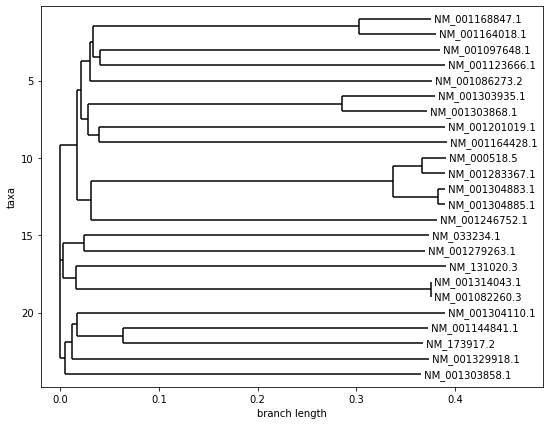

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 7))
Phylo.draw(read_tree, axes=ax)

In [31]:
Phylo.draw_ascii(read_tree)

                                                __________ NM_001168847.1
       ________________________________________|
      |                                        |___________ NM_001164018.1
     ,|
     || ___________________________________________________ NM_001097648.1
    ,|||
    || |____________________________________________________ NM_001123666.1
    ||
    ||____________________________________________________ NM_001086273.2
   ,|
   ||                                        ______________ NM_001303935.1
   || ______________________________________|
   |||                                      |_____________ NM_001303868.1
   |||
   | | _____________________________________________________ NM_001201019.1
   | ||
  _|  |_____________________________________________________ NM_001164428.1
 | |
 | |                                                      __ NM_000518.5
 | |                                                 ____|
 | |                                            